In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [9]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [11]:
x=dataset.drop(['charges'],axis=1) # axis=0: Drop rows ; axis=1: Drop columns.

In [13]:
x.head()

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [15]:
y=dataset['charges']

In [17]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 1.8/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 2.6/124.9 MB 4.2 MB/s eta 0:00:30
   - -------------------------------------- 3.4/124.9 MB 4.1 MB/s eta 0:00:30
   - -------------------------------------- 4.2/124.9 MB 4.1 MB/s eta 0:00:30
   - -------------------------------------- 5.0/124.9 MB 4.0 MB/s eta 0:00:30
   - -------------------------------------- 5.8/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 6.6/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 7.6/124.9 MB 3.9 MB/s eta 0:00:30
   -- ------------------------------------- 8.4/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 9.2/124.9 MB 4.0 MB/s eta 0:00:30
   --- ------------------------------------ 10.0/124.9 MB 4.0 MB/s eta 

In [27]:
import xgboost as xgb

In [ ]:
regressor=GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,            # Limits the maximum depth of the individual trees
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    max_features=None,      # Number of features to consider when looking for the best split
    random_state=42
)

In [29]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [31]:
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'eval_metric': 'rmse',            # Root Mean Square Error as evaluation metric
    'learning_rate': 0.1,             # Controls the step size
    'max_depth': 6,                   # Depth of each tree
    'subsample': 0.8,                 # Row sampling
    'colsample_bytree': 0.8,          # Feature sampling
    'seed': 42                        # For reproducibility
}

In [33]:
eval_set = [(dtrain, 'train'), (dtest, 'eval')] #Create an evaluation set to monitor performance during training

In [35]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=eval_set,
    early_stopping_rounds=50,
    verbose_eval=10
)

[0]	train-rmse:11616.24461	eval-rmse:12447.59750
[10]	train-rmse:6245.35110	eval-rmse:6768.84153
[20]	train-rmse:4262.28360	eval-rmse:4902.19671
[30]	train-rmse:3595.04796	eval-rmse:4547.06453
[40]	train-rmse:3245.21213	eval-rmse:4543.12300
[50]	train-rmse:3015.53004	eval-rmse:4592.95776
[60]	train-rmse:2819.72018	eval-rmse:4666.16121
[70]	train-rmse:2655.49971	eval-rmse:4717.91473
[80]	train-rmse:2501.70168	eval-rmse:4778.48339
[81]	train-rmse:2492.01784	eval-rmse:4787.60079


In [37]:
y_pred = model.predict(dtest)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

RMSE: 4784.621204257012
MAE: 2877.6012835551155
R2 Score: 0.8564452445332242


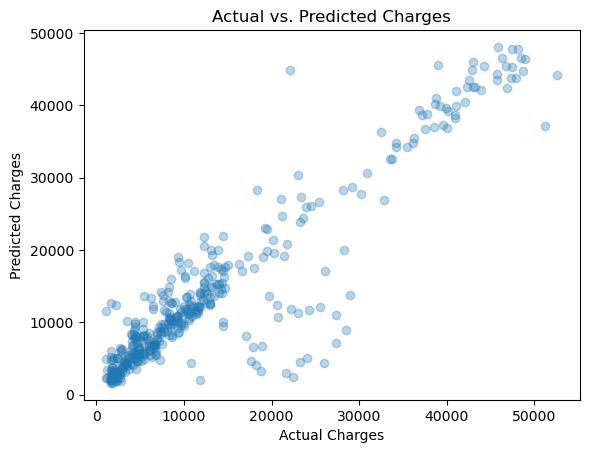

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

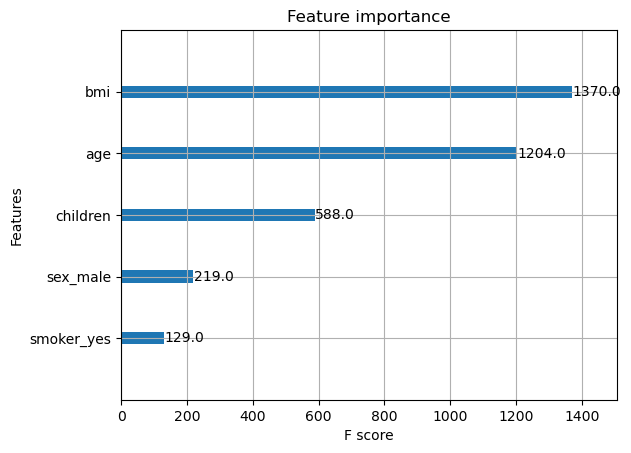

In [55]:
xgb.plot_importance(model, max_num_features=10)
plt.show()

In [61]:
importance = model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
}).sort_values(by='Importance', ascending=False)

print(importance_df)

      Feature    Importance
4  smoker_yes  2.564966e+09
1         bmi  9.016557e+07
0         age  6.953848e+07
2    children  2.780356e+07
3    sex_male  2.540904e+07
